# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [324]:
import pandas as pd # needed for DataFrames and pandas.read_json to read a JSON file at the top nested level
import json #needed for jason.load to load nested data as a string
from pandas.io.json import json_normalize #needed for json_normalize which extracts nested data in a string
import numpy as np #used below in an aggregation associated with a groupby

<font color=black></font>
## QUESTION 1: Find the 10 Countries with the Most Projects

In [325]:
# load json data using pandas.read_json into a dataframe because the target data are at the top level of the json file (i.e not nested)
world_bank_df = pd.read_json('data/world_bank_projects.json')

In [326]:
# Examine the DataFrame's components
#world_bank_df.info()

# View the DataFrame's header
#world_bank_df.head()

In [327]:
# Filter the most relevant columns from the parent DataFrame
projects = world_bank_df[['countrycode','countryshortname','project_name']]

# Change the index to the countrycode column for increased readability
projects = projects.set_index('countrycode')
projects.head()

,countryshortname,project_name
countrycode,,
ET,Ethiopia,Ethiopia General Education Quality Improvement...
TN,Tunisia,TN: DTF Social Protection Reforms Support
TV,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
RY,"Yemen, Republic of",Gov't and Civil Society Organization Partnership
LS,Lesotho,Second Private Sector Competitiveness and Econ...


In [328]:
# Group the filtered DataFrame to show the number of projects for each country
grouped_projects = projects.groupby(['countrycode','countryshortname'])['project_name'].count()

# Sort the number of projects per country in descending order and display the ten countries with the most projects
grouped_projects = grouped_projects.sort_values(ascending=False).head(10)

# Display the grouped and filtered DataFrame
grouped_projects

countrycode  countryshortname  
CN           China                 19
ID           Indonesia             19
VN           Vietnam               17
IN           India                 16
RY           Yemen, Republic of    13
NP           Nepal                 12
BD           Bangladesh            12
MA           Morocco               12
MZ           Mozambique            11
3A           Africa                11
Name: project_name, dtype: int64

Text(0,0.5,'Number of Projects')

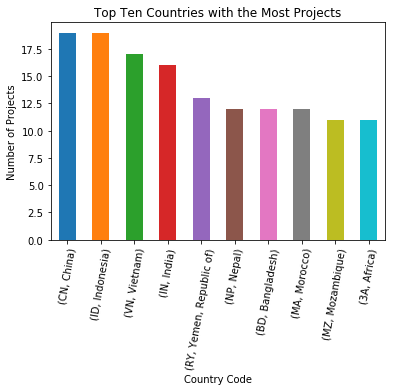

In [329]:
# Create a bar graph comparing the number of projects in different countries
gp_plot = grouped_projects.plot(kind='bar', title = 'Top Ten Countries with the Most Projects', rot = 80)
gp_plot.set_xlabel('Country Code')
gp_plot.set_ylabel('Number of Projects')

<font color=black></font>
## QUESTION 2: Find the Top 10 Major Project Themes (Using Column 'mjtheme_namecode')

In [330]:
# load json using jason.load from json as a string because the target data are nested
json_data = json.load((open('data/world_bank_projects.json')))

In [331]:
# Use json_normalize from pandas.io.json.json_normalize to extract the nested target data into a DataFrame
tdf = json_normalize(json_data, 'mjtheme_namecode')

In [332]:
# Examine the DataFrame's components
#tdf.info()

# View the DataFrame's header
#tdf.head()

# Sort the DataFrame and view it
#tdf_sorted = tdf.sort_values('code')
#tdf_sorted

In [333]:
# Group the DataFrame by themes ('name' column)
tdf_grouped = tdf.groupby('name').count()

# Sort the grouped DataFrame in descending order using the 'code' column and display the ten most common themes
tdf_sorted = tdf_grouped.sort_values('code', ascending=False).head(10)
tdf_sorted

,code
name,
Environment and natural resources management,223
Rural development,202
Human development,197
Public sector governance,184
Social protection and risk management,158
Financial and private sector development,130
,122
Social dev/gender/inclusion,119
Trade and integration,72


Text(0,0.5,'Number of Projects')

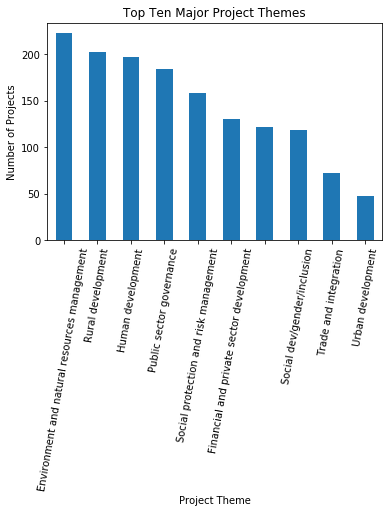

In [334]:
# Bar graph of the top ten major project themes
tdf_sorted_plot = tdf_sorted.plot(kind='bar', title = 'Top Ten Major Project Themes', rot = 80, legend=False)
tdf_sorted_plot.set_xlabel('Project Theme')
tdf_sorted_plot.set_ylabel('Number of Projects')

<font color=black></font>
## QUESTION 3: Create a Dataframe with the Missing Names Filled in

In [335]:
# load json as a string because the target data are nested
json_data = json.load((open('data/world_bank_projects.json')))

In [336]:
# Use json_normalize to extract the nested target data
df = json_normalize(json_data, 'mjtheme_namecode')

In [337]:
# Examine the DataFrame's components
#df.info()

# View the DataFrame's header
#df.head()

# Sort the DataFrame and view it to confirm presence of missing data
#df_sorted = df.sort_values('code')
#df_sorted

In [338]:
# Replacing missing values in the 'name' column using forward fill and save as a new DataFrame
df_sorted['name'] = df_sorted.name.replace('',method='ffill')

# View the new DataFrame to confirm replacement of missing values
#df_sorted

In [339]:
# Group by the 'name' column, show the total in each theme as 'total number'
themes_sorted_df = df_sorted.groupby('name', as_index=False)['name'].agg({'total_number' : np.size})

# View the new groupe and sorted DataFrame
#themes_sorted_df

In [340]:
# Rename the 'name' column to 'project_theme'
themes_sorted_df = themes_sorted_df.rename(columns={'name': 'project_theme'})

# View the DataFrame to confirm renaming
themes_sorted_df

,project_theme,total_number
0,Economic management,38
1,Environment and natural resources management,250
2,Financial and private sector development,146
3,Human development,210
4,Public sector governance,199
5,Rule of law,15
6,Rural development,216
7,Social dev/gender/inclusion,130
8,Social protection and risk management,168
9,Trade and integration,77


In [341]:
# Sort the DataFrame by the 'total_number' column in descending order
themes_sorted_df = themes_sorted_df.sort_values(by='total_number', ascending=False)

# View the DataFrame to confirm sorting
themes_sorted_df

,project_theme,total_number
1,Environment and natural resources management,250
6,Rural development,216
3,Human development,210
4,Public sector governance,199
8,Social protection and risk management,168
2,Financial and private sector development,146
7,Social dev/gender/inclusion,130
9,Trade and integration,77
10,Urban development,50
0,Economic management,38


Text(0,0.5,'Number of Projects')

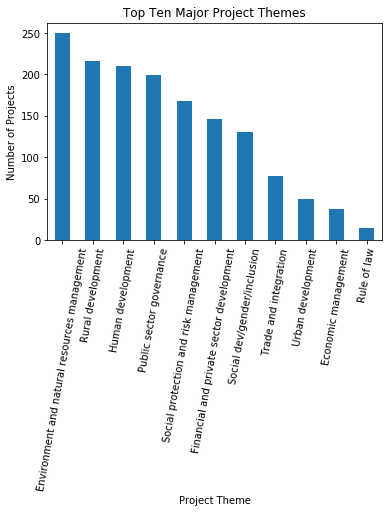

In [342]:
# Bar graph of the top ten major project themes after filling missing values
tsdf_plot = themes_sorted_df.plot(kind='bar', x='project_theme',title = 'Top Ten Major Project Themes', rot = 80, legend=False)
tsdf_plot.set_xlabel('Project Theme')
tsdf_plot.set_ylabel('Number of Projects')